# Lesson 4 - Vortex

## Math:

$$u_\theta\left(r,\theta\right) = \frac{\text{constant}}{r}\text{,}\quad u_\theta\left(r,\theta\right) = 0$$

$$\Gamma = -\oint\mathbf{v}\cdot d\vec{l} = -u_\theta2\pi r$$

$$\Rightarrow u_\theta\left(r,\theta\right) = \frac{\Gamma}{2\pi r}$$

$$\Rightarrow \psi\left(r,\theta\right) = \frac{\Gamma}{2\pi}\ln r$$

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln{\left(x^2 + y^2\right)}$$

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2 + y^2}\text{,}\quad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2 + y^2}$$

## Computing a Vortex:

In [45]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# create mesh grid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X, Y = np.meshgrid(x,y)

In [47]:
# vortex circulation and location
gamma = 5.0
x_vort, y_vort = 0.0, 0.0

In [48]:
# function definitions
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    X: 2D numpy array of floats
        x-coordinates of the mesh grid
    Y: 2D numpy array of floats
        y-coordinates of the mesh grid
        
    Returns
    -------
    u: 2D numpy array of floats
        x-component velocity field values
    v: 2D numpy array of floats
        y-component velocity field values
    """
    
    u = +strength/(2*math.pi)*(Y-yv)/((X-xv)**2 + (Y-yv)**2)
    v = -strength/(2*math.pi)*(X-xv)/((X-xv)**2 + (Y-yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream function created by a vortex
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    X: 2D numpy array of floats
        x-coordinates of the mesh grid
    Y: 2D numpy array of floats
        y-coordinates of the mesh grid
        
    Returns
    -------
    psi: 2D numpy array of floats
        stream function values
    """
    
    psi = strength/(4*math.pi)*np.log((X-xv)**2 + (Y-yv)**2)
    
    return psi

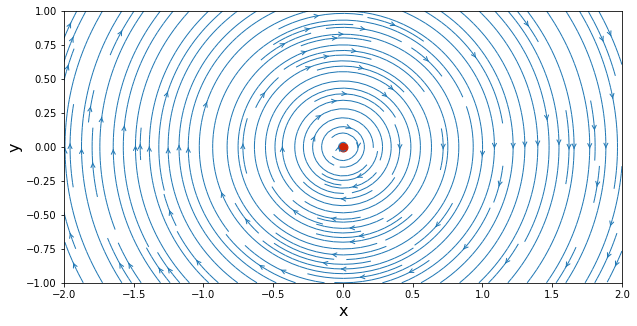

In [49]:
# compute velocity field and stream function values:
u_vort, v_vort = get_velocity_vortex(gamma, x_vort, y_vort, X, Y)
psi_vort = get_stream_function_vortex(gamma, x_vort, y_vort, X, Y)

#plot vortex
size = 10
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vort, v_vort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vort, y_vort, s=80, color='#CD2305', marker='o');

## Vortex and Sink:

Use superposition to model flow around point vortex and sink

In [50]:
# sink strength and location
strength_sink = -1.0
x_sink, y_sink = 0.0, 0.0

# function definitions
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*math.pi)*np.arctan2((Y-ys), (X-xs))
    
    return psi

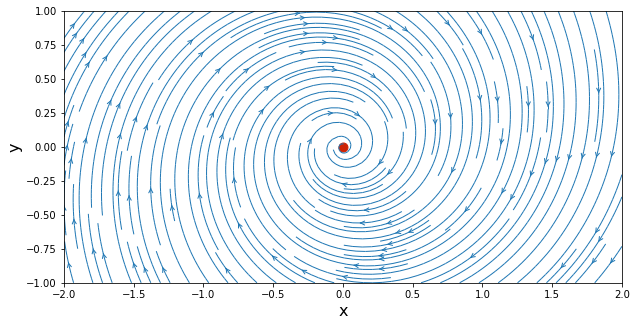

In [51]:
# compute sink velocity field and stream function
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

# superposition
u = u_vort + u_sink
v = v_vort + v_sink
psi = psi_vort + psi_sink

# plot streamlines
size = 10
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vort, y_vort, color='#CD2305', s=80, marker='o');